In [2]:
import matplotlib as mpl
font_path = "C:/Users/SamSung/Desktop/2023 2학기/통계분석/실습용 코드,엑셀/NanumGothic.ttf"

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.sans-serif'] = ['NanumGothic']
mpl.rc('font', size=10)  # 원하는 폰트 크기 설정


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('train.csv')
building_info = pd.read_csv('building_info.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [6]:
test_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [7]:
train_df = train_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train_df.drop('num_date_time', axis = 1, inplace=True)

In [8]:
test_df = test_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test_df.drop('num_date_time', axis = 1, inplace=True)

In [9]:
train_df.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [70]:
building_info = building_info.rename(columns={
    '건물번호': 'building_id',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_cap',
    'ESS저장용량(kWh)': 'ess_cap',
    'PCS용량(kW)': 'pcs_cap',
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}
building_info['building_type'] = building_info['building_type'].replace(translation_dict)
building_info.head()

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [50]:
building_info.head()

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [51]:
train_df = pd.merge(train_df, building_info, on='building_number', how='left')
test_df = pd.merge(test_df, building_info, on='building_number', how='left')

In [52]:
len(train_df)

204000

In [53]:
train_df.isna().sum()

building_number              0
date_time                    0
temperature                  0
rainfall                160069
windspeed                   19
humidity                     9
sunshine                 75182
solar_radiation          87913
power_consumption            0
building_type_x              0
total_area_x                 0
cooling_area_x               0
hour                         0
day                          0
month                        0
year                         0
day_of_year                  0
hour_of_year                 0
day_of_week                  0
building_type_y              0
total_area_y                 0
cooling_area_y               0
solar_power_capacity         0
ess_capacity                 0
pcs_capacity                 0
dtype: int64

In [54]:
test_df.isna().sum()

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
building_type_x         0
total_area_x            0
cooling_area_x          0
building_type_y         0
total_area_y            0
cooling_area_y          0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
dtype: int64

In [55]:
print(len(train_df[train_df['solar_power_capacity'] == '-']))
print(len(train_df[train_df['ess_capacity'] == '-']))
print(len(train_df[train_df['pcs_capacity'] == '-']))

130560
193800
193800


In [56]:
train_df = train_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis=1)
test_df = test_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis=1)

In [57]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y%m%d %H')

# date time feature 생성
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year

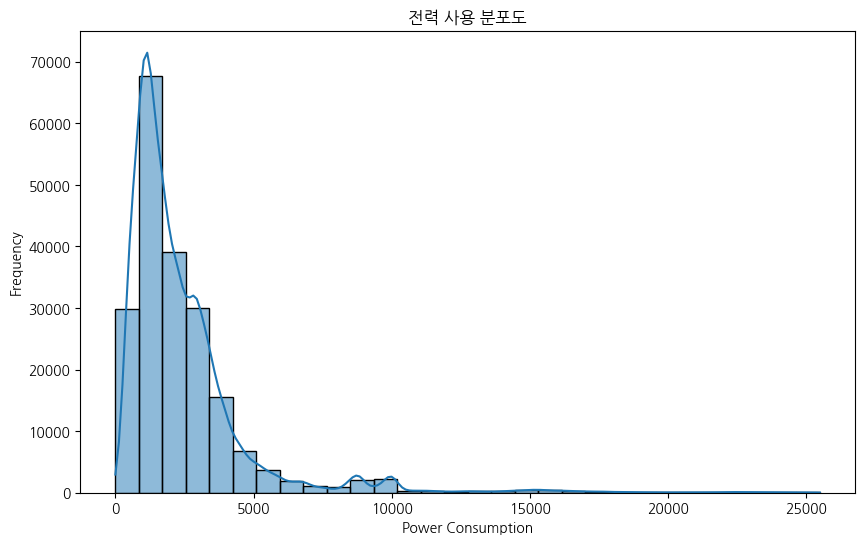

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['power_consumption'], bins=30, kde=True)
plt.title('전력 사용 분포도')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

In [59]:
# 년기준 일 평균 소비전력
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()
# 년기준 시간평균 소비전력
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()

# 년기준 월평균 소비전력
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()

# 일기준 시간 평균 소비전력
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()

# 월기준 시간 평균 소비전력
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()

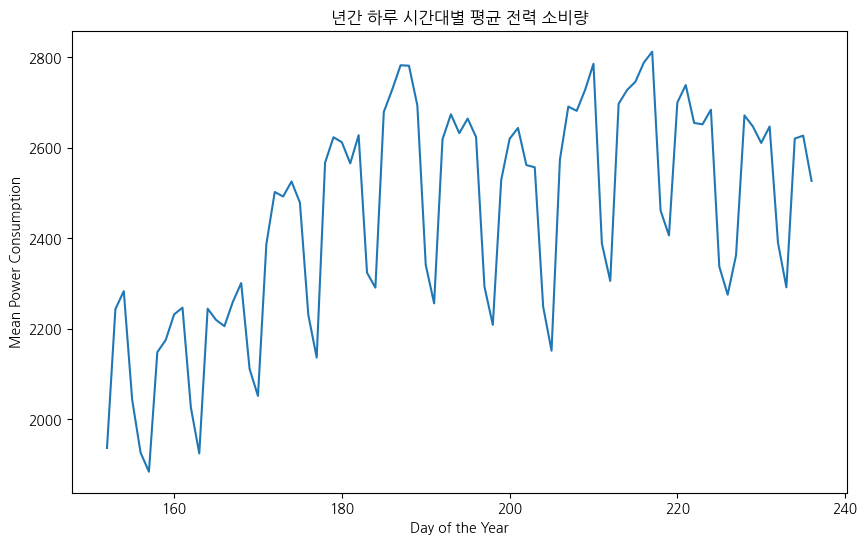

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_power_by_day_of_year.index, y=mean_power_by_day_of_year.values)
plt.title('년간 하루 시간대별 평균 전력 소비량')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

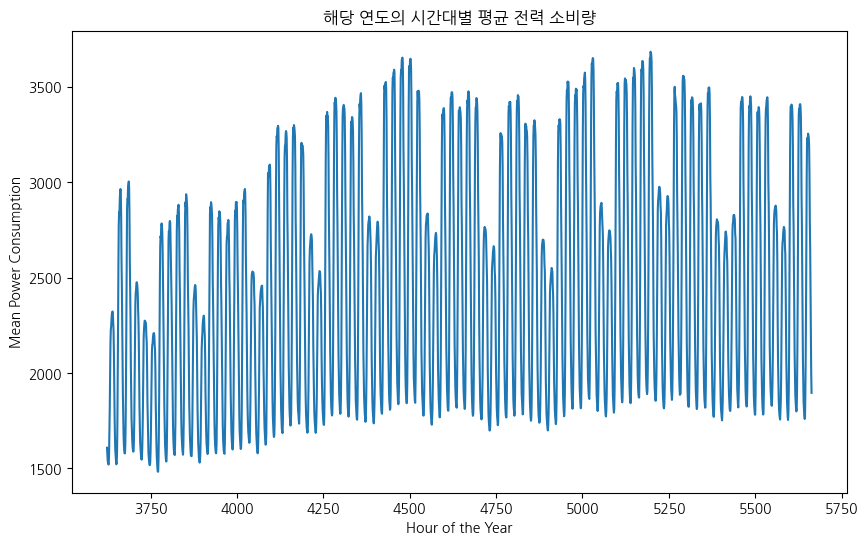

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('해당 연도의 시간대별 평균 전력 소비량')
plt.xlabel('Hour of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

<Axes: xlabel='windspeed', ylabel='Count'>

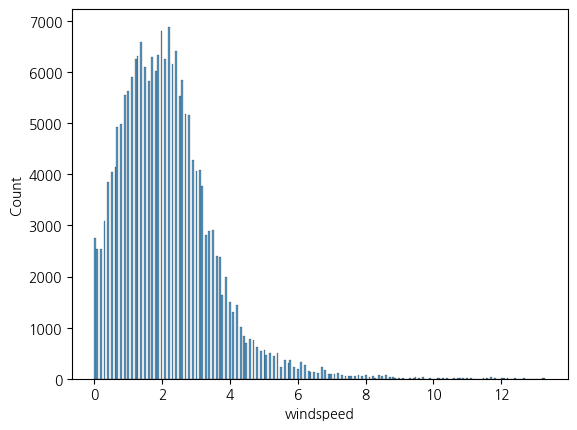

In [62]:
sns.histplot(train_df['windspeed'])

<Axes: xlabel='humidity', ylabel='Count'>

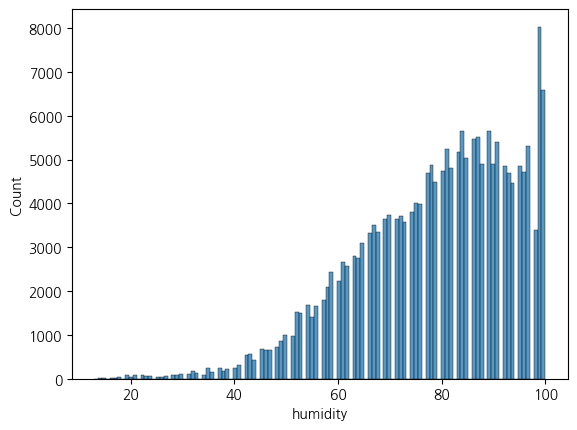

In [63]:
sns.histplot(train_df['humidity'])

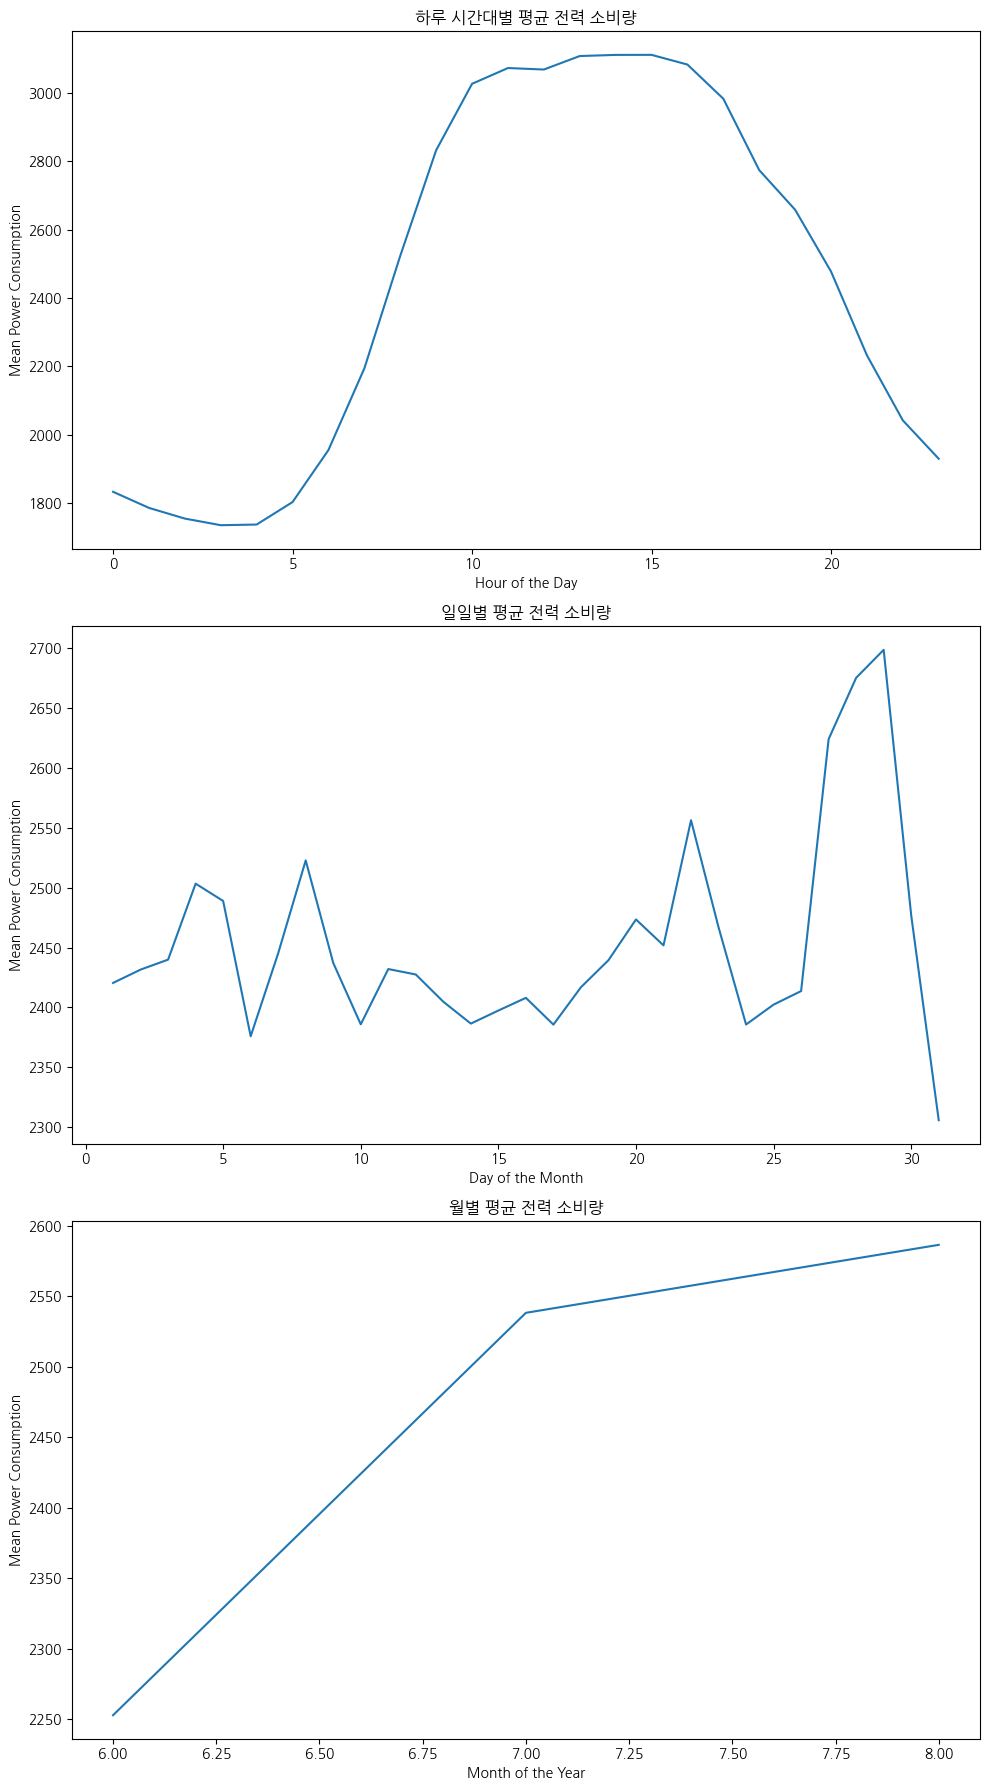

In [64]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('하루 시간대별 평균 전력 소비량')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
axs[1].set_title('일일별 평균 전력 소비량')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('월별 평균 전력 소비량')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

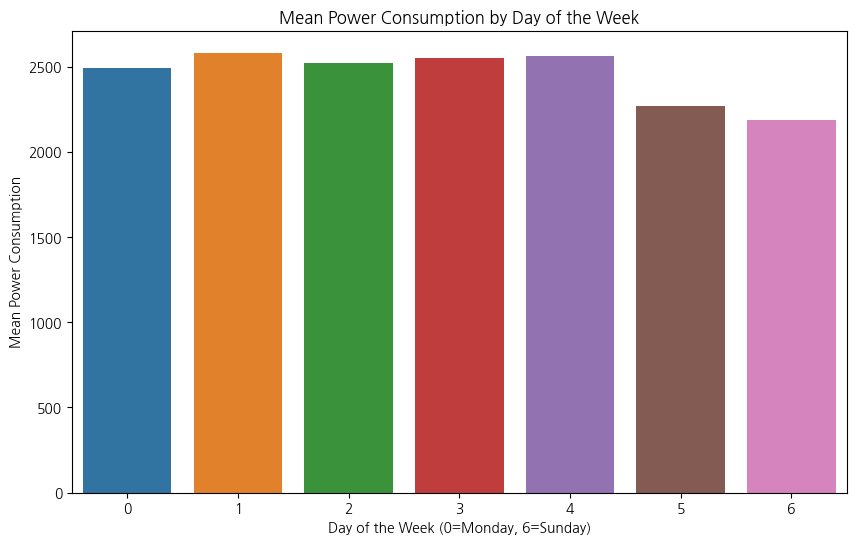

In [65]:
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek

# 요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('Mean Power Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Power Consumption')
plt.show()

In [72]:
print(train_df.columns)

Index(['building_number', 'date_time', 'temperature', 'rainfall', 'windspeed',
       'humidity', 'sunshine', 'solar_radiation', 'power_consumption',
       'building_type_x', 'total_area_x', 'cooling_area_x', 'hour', 'day',
       'month', 'year', 'day_of_year', 'hour_of_year', 'day_of_week',
       'building_type_y', 'total_area_y', 'cooling_area_y'],
      dtype='object')


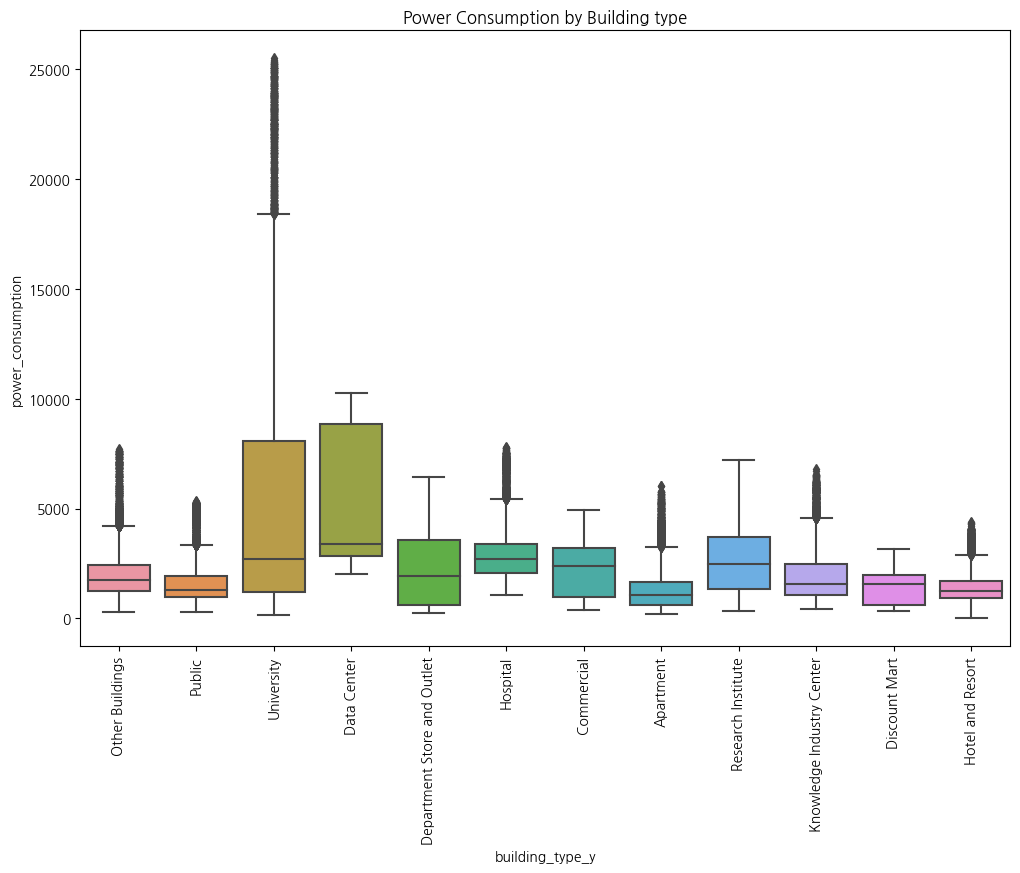

In [75]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='building_type_y', y='power_consumption', data=train_df)
plt.title('Power Consumption by Building type')
plt.xticks(rotation=90)
plt.show()

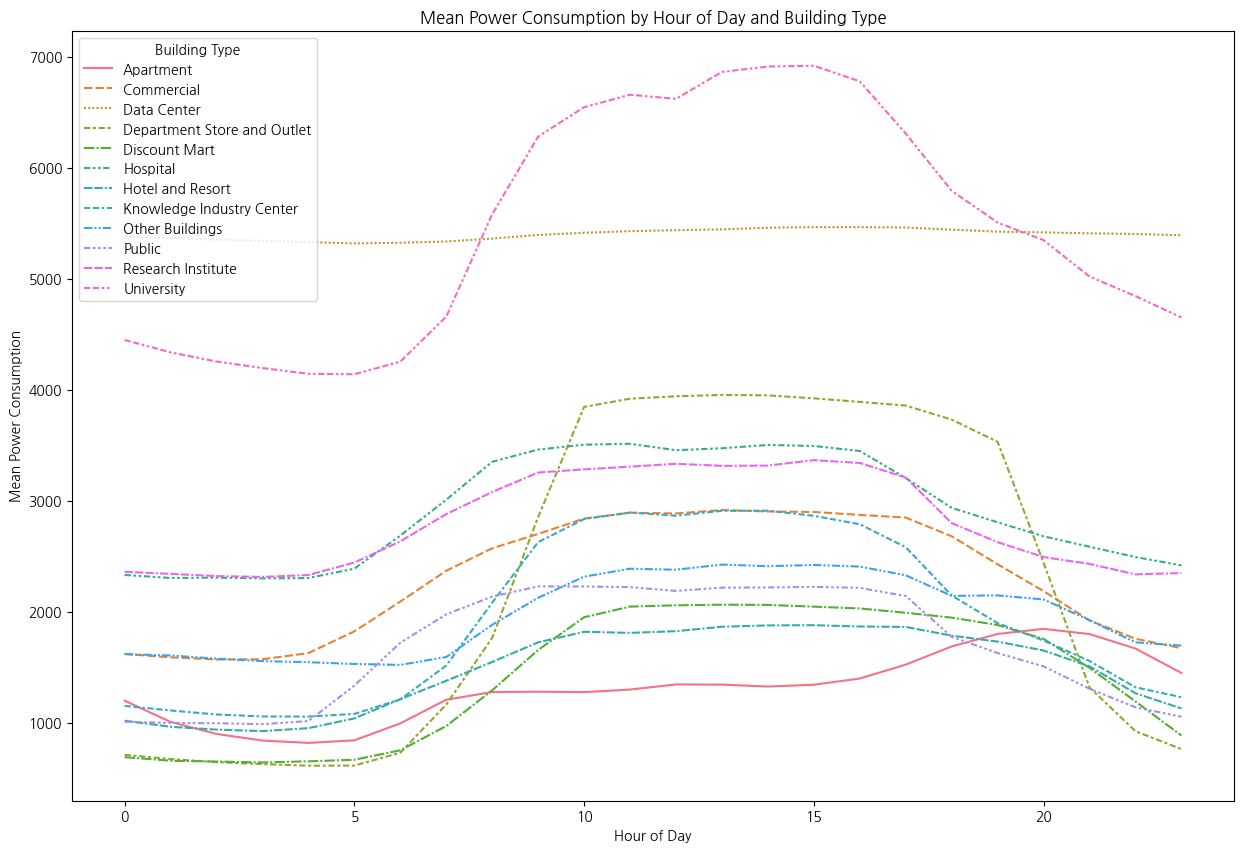

In [78]:
mean_power_by_hour_building = train_df.groupby(['hour', 'building_type_y'])['power_consumption'].mean().reset_index()

pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='building_type_y', values='power_consumption')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df)
plt.title('Mean Power Consumption by Hour of Day and Building Type')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()

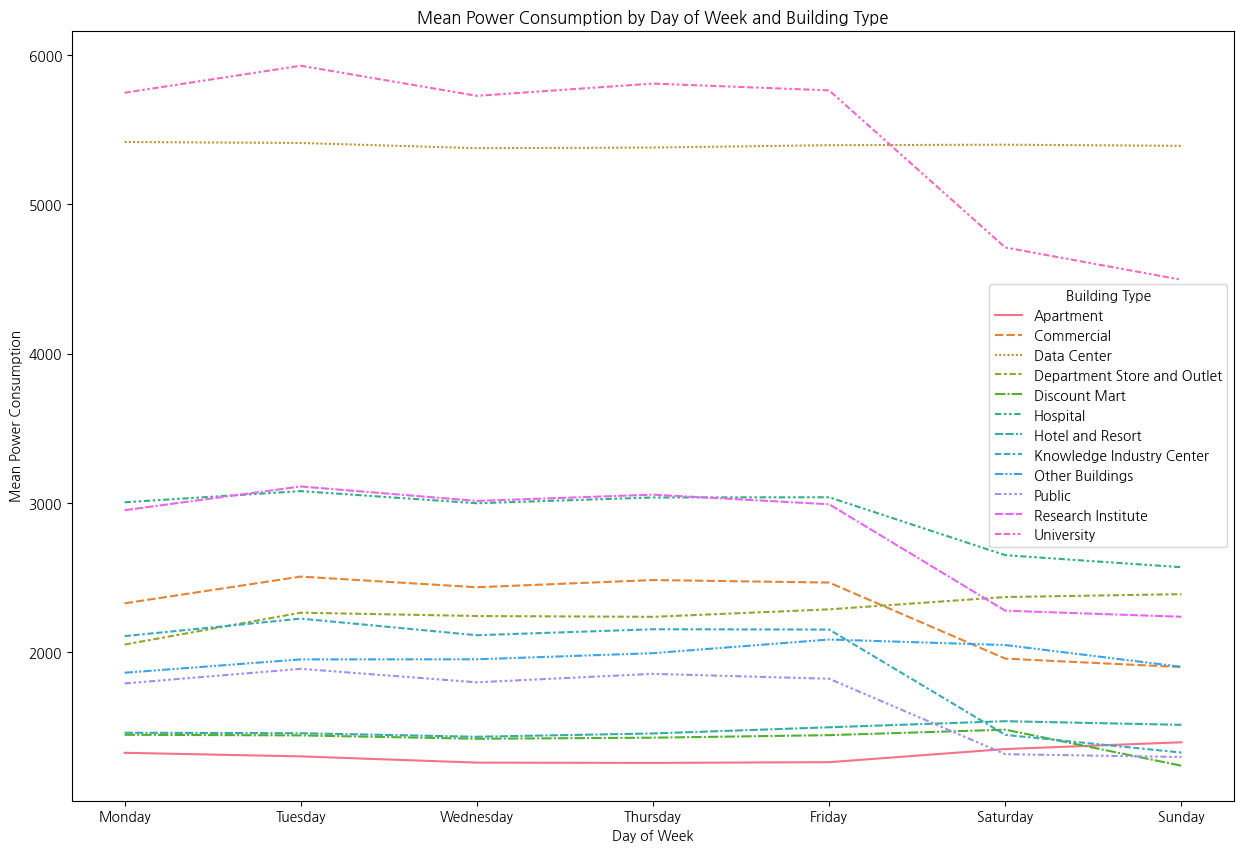

In [79]:
mean_power_by_day_building = train_df.groupby(['day_of_week', 'building_type_y'])['power_consumption'].mean().reset_index()

pivot_df_day = mean_power_by_day_building.pivot(index='day_of_week', columns='building_type_y', values='power_consumption')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df_day.index = day_names

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df_day)
plt.title('Mean Power Consumption by Day of Week and Building Type')
plt.xlabel('Day of Week')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()


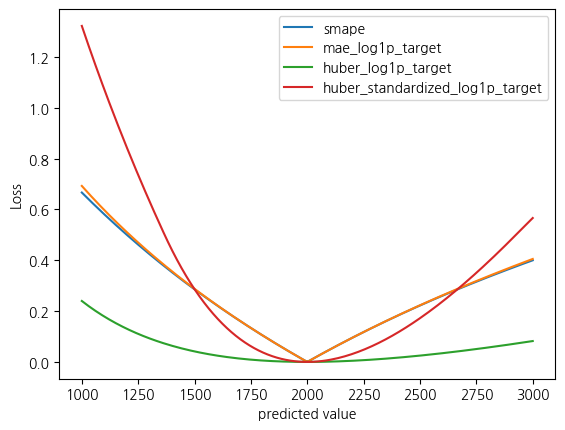

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def smape(y_true, y_pred):
    
    # CONVERT TO NUMPY
    y_true = y_true.copy().reshape(-1)
    y_pred = y_pred.copy().reshape(-1)
    
    # WHEN BOTH EQUAL ZERO, METRIC IS ZERO
    both = np.abs(y_true) + np.abs(y_pred)
    idx = np.where(both==0)[0]
    y_true[idx]=1; y_pred[idx]=1
    
    return 2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))

def log1p_mae(y_true, y_pred):

    y_true = np.log1p(y_true)
    y_pred = np.log1p(y_pred)

    return np.abs(y_true - y_pred)

DELTA = 1

def log1p_huber(y_true, y_pred):
    
    y_true = np.log1p(y_true)
    y_pred = np.log1p(y_pred)

    abs = np.abs(y_true - y_pred)

    return np.where(abs<=DELTA, 1/2*(y_true - y_pred)**2, DELTA*(abs - 1/2*DELTA))

def standardized_log1p_huber(y_true, y_pred):

    y_true = np.log1p(y_true)
    mean = y_true[0]
    # std/mean of the log1p_target is usually 0.05
    std = 0.05 * mean
    y_pred = np.log1p(y_pred)
    y_true = (y_true - mean) / std
    y_pred = (y_pred - mean) / std

    abs = np.abs(y_true - y_pred)

    return np.where(abs<=DELTA, 1/2*(y_true - y_pred)**2, DELTA*(abs - 1/2*DELTA))

def plot_smape(y_true, y_pred):
    plt.plot(y_pred, smape(y_true, y_pred), label='smape')
    plt.plot(y_pred, log1p_mae(y_true, y_pred), label='mae_log1p_target')
    plt.plot(y_pred, log1p_huber(y_true, y_pred), label='huber_log1p_target')
    plt.plot(y_pred, standardized_log1p_huber(y_true, y_pred), label='huber_standardized_log1p_target')
    plt.xlabel('predicted value')
    plt.ylabel('Loss')
    plt.legend()

y_true = np.array([2000]*200)
y_pred = np.linspace(1000, 3000, num=200)
plot_smape(y_true, y_pred)

In [83]:
print(train_df.columns)

Index(['building_number', 'date_time', 'temperature', 'rainfall', 'windspeed',
       'humidity', 'sunshine', 'solar_radiation', 'power_consumption',
       'building_type_x', 'total_area_x', 'cooling_area_x', 'hour', 'day',
       'month', 'year', 'day_of_year', 'hour_of_year', 'day_of_week',
       'building_type_y', 'total_area_y', 'cooling_area_y'],
      dtype='object')


In [85]:
import matplotlib as mpl
font_path = "C:/Users/SamSung/Desktop/2023 2학기/통계분석/실습용 코드,엑셀/NanumGothic.ttf"

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.sans-serif'] = ['NanumGothic']
mpl.rc('font', size=10)  # 원하는 폰트 크기 설정

In [92]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [94]:
plt.rcParams['font.family'] = 'NanumGothic'  # 한글 폰트 설정

C:\Users\SamSung\AppData\Local\Temp\ipykernel_38620\496044109.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


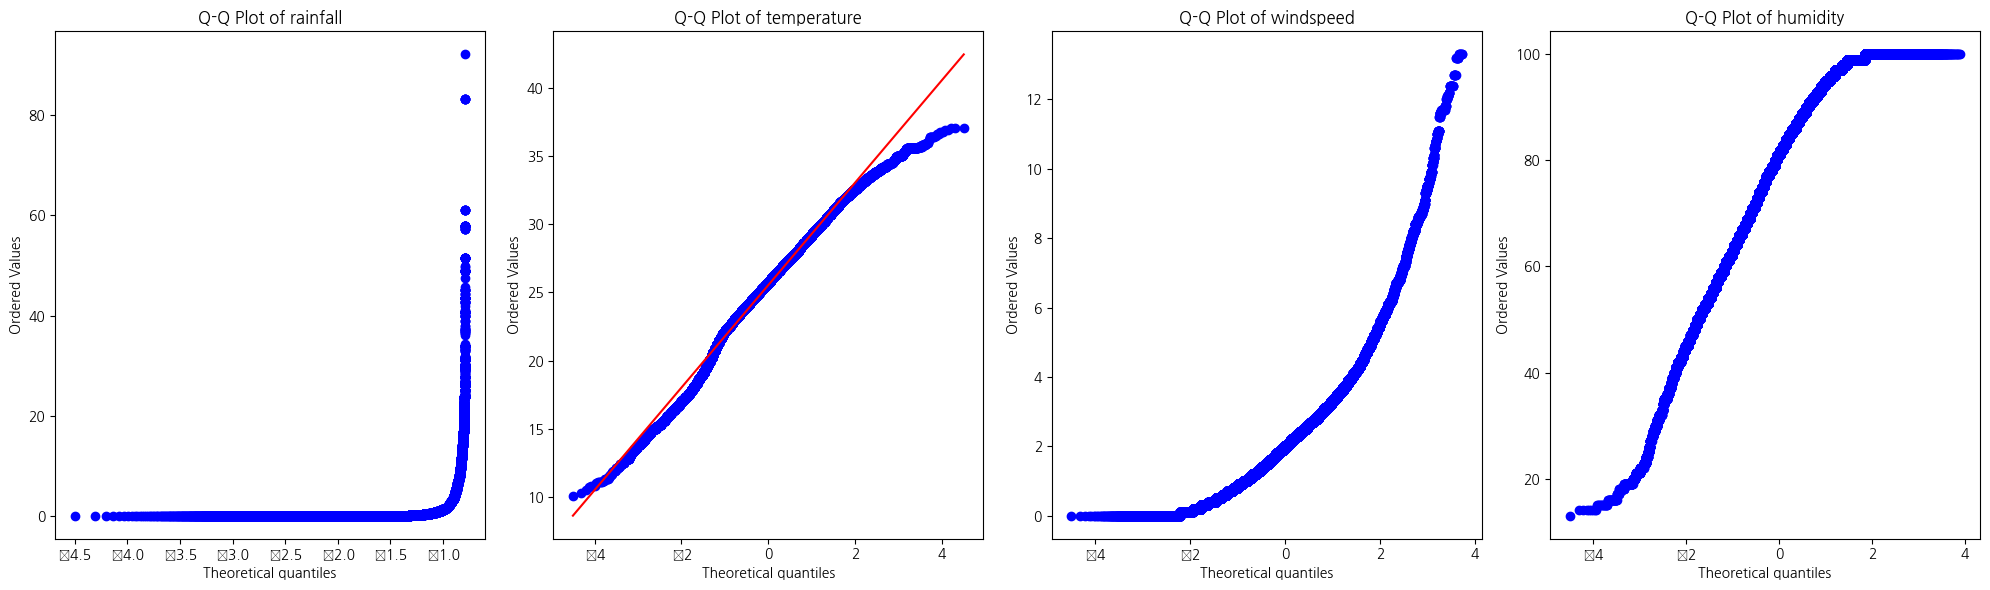

In [95]:
#정규성
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq(dataframe, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(5 * len(columns), 6))

    for i, col in enumerate(columns):
        stats.probplot(dataframe[col], dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

plot_qq(train_df, ['rainfall', 'temperature', 'windspeed', 'humidity'])
#정규성을 따르지 않음

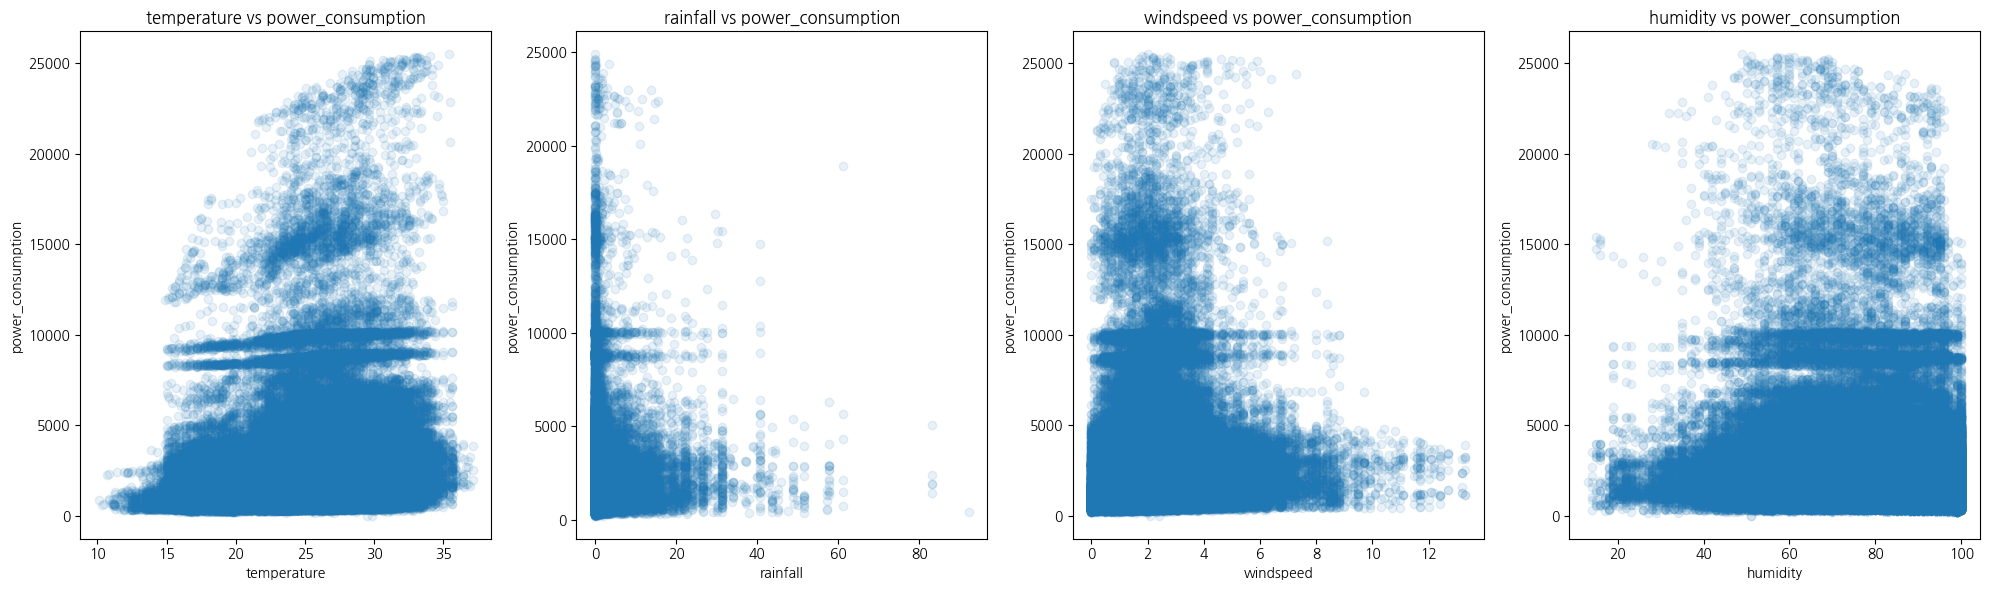

In [88]:
#비선형성 확인
#다 nonlinear함
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(dataframe, independent_vars, dependent_var, alpha_value=0.1):
    fig, axs = plt.subplots(1, len(independent_vars), figsize=(5 * len(independent_vars), 6))

    for i, ivar in enumerate(independent_vars):
        axs[i].scatter(dataframe[ivar], dataframe[dependent_var], alpha=alpha_value)
        axs[i].set_xlabel(ivar)
        axs[i].set_ylabel(dependent_var)
        axs[i].set_title(f'{ivar} vs {dependent_var}')

    plt.tight_layout()
    plt.show()
plot_scatter(train_df, ['temperature', 'rainfall', 'windspeed', 'humidity'], 'power_consumption', alpha_value=0.1)

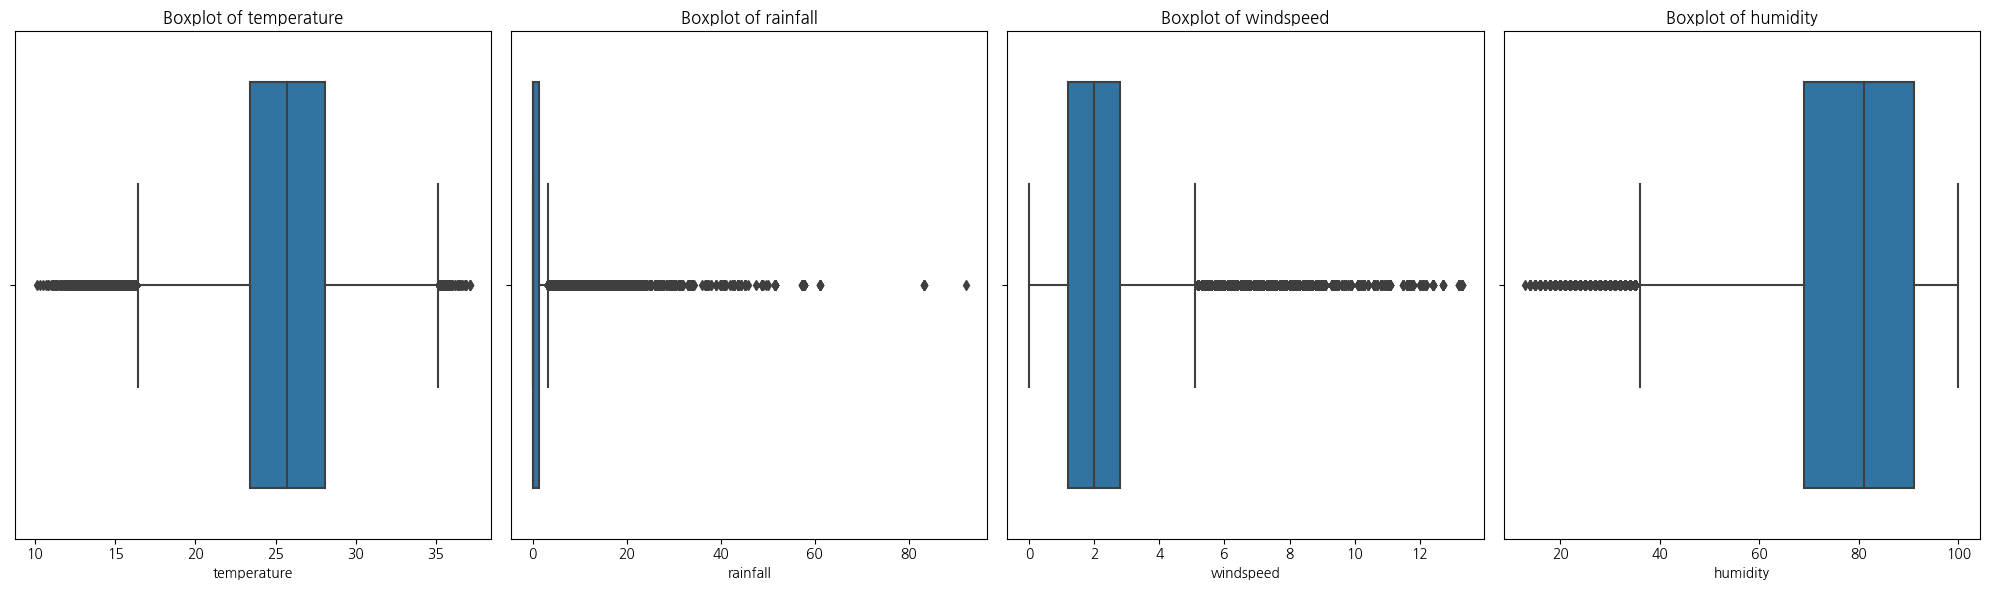

In [90]:
#이상치 확인
def plot_sampled_boxplots(dataframe, independent_vars, dependent_var, sample_size=1000):
    fig, axs = plt.subplots(1, len(independent_vars), figsize=(5 * len(independent_vars), 6))

    for i, ivar in enumerate(independent_vars):
        sns.boxplot(x=dataframe[ivar], ax=axs[i])
        axs[i].set_title(f'Boxplot of {ivar}')

    plt.tight_layout()
    plt.show()
plot_sampled_boxplots(train_df, ['temperature', 'rainfall', 'windspeed', 'humidity'], 'power_consumption')
     

In [91]:
#비정규, outlier 상당수 존재, 비선형이므로 data의 rank를 이용하여 상관관계 계산
#non-parametric correlation.
from scipy import stats
climate_variables = train_df[['temperature', 'rainfall', 'windspeed', 'humidity']]
power_consumption = train_df['power_consumption']

for variable in climate_variables.columns:
    correlation, p_value = stats.spearmanr(climate_variables[variable], power_consumption)
    print(f'{variable}와 전력 소비량의 상관계수: {correlation}, p-value: {p_value}')


temperature와 전력 소비량의 상관계수: 0.2752228203556909, p-value: 0.0
rainfall와 전력 소비량의 상관계수: nan, p-value: nan
windspeed와 전력 소비량의 상관계수: nan, p-value: nan
humidity와 전력 소비량의 상관계수: nan, p-value: nan


In [97]:
import statsmodels.api as sm

X = train_df[['temperature', 'rainfall', 'windspeed', 'humidity']]
X = sm.add_constant(X)  # 상수항 추가
y = train_df['power_consumption']

model = sm.OLS(y, X).fit()
print(model.summary())

MissingDataError: exog contains inf or nans

In [98]:
print(train_df.isnull().sum())  # 결측값 확인
print(train_df.isin([np.inf, -np.inf]).sum())  # 무한대 확인

building_number           0
date_time                 0
temperature               0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
building_type_x           0
total_area_x              0
cooling_area_x            0
hour                      0
day                       0
month                     0
year                      0
day_of_year               0
hour_of_year              0
day_of_week               0
building_type_y           0
total_area_y              0
cooling_area_y            0
dtype: int64
building_number      0
date_time            0
temperature          0
rainfall             0
windspeed            0
humidity             0
sunshine             0
solar_radiation      0
power_consumption    0
building_type_x      0
total_area_x         0
cooling_area_x       0
hour                 0
day                  0
month                0
year                 0
day

In [99]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 결측값을 중앙값으로 대체 (예시)
median_values = train_df.median()
train_df.fillna(median_values, inplace=True)

C:\Users\SamSung\AppData\Local\Temp\ipykernel_38620\1057603017.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_values = train_df.median()
C:\Users\SamSung\AppData\Local\Temp\ipykernel_38620\1057603017.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = train_df.median()


In [100]:
X = train_df[['temperature', 'rainfall', 'windspeed', 'humidity']]
X = sm.add_constant(X)  # 상수항 추가
y = train_df['power_consumption']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      power_consumption   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2085.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:11:23   Log-Likelihood:            -1.8766e+06
No. Observations:              204000   AIC:                         3.753e+06
Df Residuals:                  203995   BIC:                         3.753e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         918.2810     58.601     15.670      

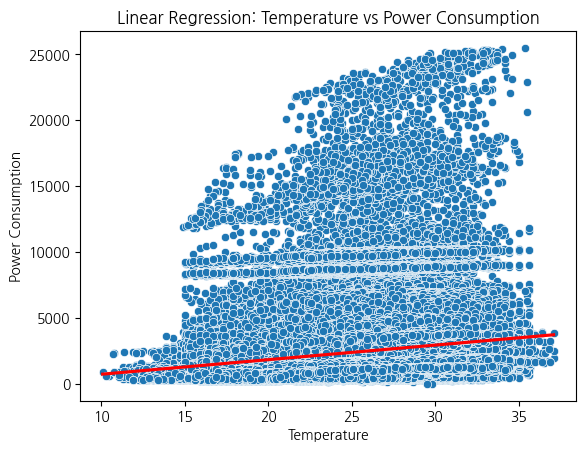

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 회귀 모델 적합
X = train_df[['temperature', 'rainfall', 'windspeed', 'humidity']]
X = sm.add_constant(X)  # 상수항 추가
y = train_df['power_consumption']
model = sm.OLS(y, X).fit()

# 산점도와 회귀 직선 그리기
sns.scatterplot(x='temperature', y='power_consumption', data=train_df)
sns.regplot(x='temperature', y='power_consumption', data=train_df, scatter=False, color='red')

plt.title('Linear Regression: Temperature vs Power Consumption')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.show()
